In [101]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
tf.random.set_seed(1234)

In [102]:
def load_data():
    """
    Loading the mnist data - each example - is a image of 20 * 20 pixels unrolled to 400
    """
    X = np.load("./X_mnist.npy") 
    y = np.load("./y_mnist.npy")
    X = X[:1000] #getting the examples of only 0 and 1
    y = y[:1000]
    return X, y
    
    
X, y = load_data()

In [103]:
print("X.shape: "+str(X.shape))
print("y.shape: "+str(y.shape))
print(np.unique(y))
print(f"First image {X[0]}")
print(f"Its label {y[0]}")

X.shape: (1000, 400)
y.shape: (1000, 1)
[0 1]
First image [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00

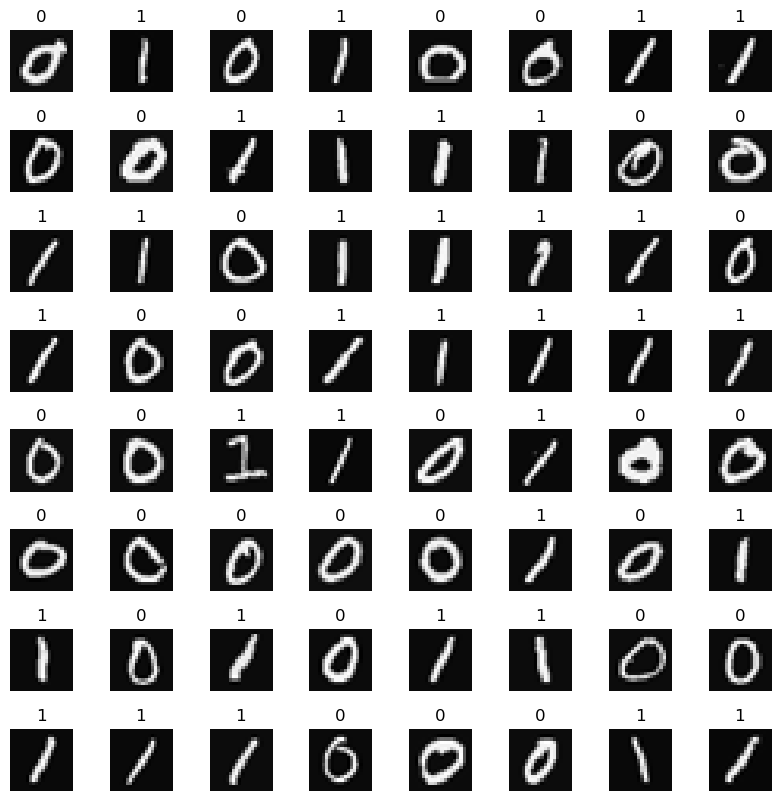

In [104]:
#plotting the random 64 images
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#show the random 64 images
def plot_images(X, y):
    m, n = X.shape
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    fig.tight_layout(pad=0.1)
    for idx, ax in enumerate(axes.flat):
        # Select random index for each axis in 1000 numbers
        random_idx = np.random.randint(m)
        
        # Select rows corresponding to the random indices and reshape the image
        X_reshaped = X[random_idx].reshape((20, 20)).T
        #Note the usual examples with columns we feed to the models are actually the transposed values. to reshape to original, we need to again transpose it
        
        ax.imshow(X_reshaped, cmap="gray")
        ax.set_title(y[random_idx, 0])
        ax.set_axis_off()
        
plot_images(X, y)

    #input layer - 400 units
    #setting up the architecture of 3 layers
    #layer 1 - 25 units => w shape - (400, 25), b - (25,) , total params w 's - 400 * 25 , b = 1 * 25 = 10000 + 25 = 10025
    #layer 2 - 15 units => w shape - (25, 15), b - (15,) , total params w 's - 25 * 15 , b = 1 * 15 = 375 + 15 = 390
    #layer 3 - 1 unit => wshape - (15, 1), b - (1,) , total params w 's - 15 * 1 , b = 1 * 1 = 15 + 1 = 16

In [109]:
#architecture
model = Sequential([
    Input(shape=(400,)), #specify input size
    Dense(units=25, activation="sigmoid"),
    Dense(units=15, activation="sigmoid"),
    Dense(units=1, activation="sigmoid")
], name="mymodel")
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 25)                10025     
                                                                 
 dense_22 (Dense)            (None, 15)                390       
                                                                 
 dense_23 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
#visualize the intialised params(w and b) shapes for each layer
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(type(W1))

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)
<class 'numpy.ndarray'>


In [111]:
#visualize the intialised params from the tensor itself. Lets see for layer 3
model.layers[2].weights #return tensor
# model.layers[2].get_weights() #return array

[<tf.Variable 'dense_23/kernel:0' shape=(15, 1) dtype=float32, numpy=
 array([[-0.39533693],
        [ 0.26987445],
        [-0.4742951 ],
        [-0.51370895],
        [ 0.49492508],
        [-0.40582925],
        [-0.5194154 ],
        [ 0.3798567 ],
        [ 0.20558351],
        [ 0.38974673],
        [-0.30664307],
        [ 0.5257639 ],
        [ 0.21887398],
        [-0.54544926],
        [-0.14099708]], dtype=float32)>,
 <tf.Variable 'dense_23/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [113]:
#setting up loss and optimizer
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

#Training
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5982
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4103
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2641
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1774
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1285
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0990
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0798
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0660
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0560
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0482
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0422
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0374
Epoch 13/20
32/32 [==============================

In [114]:
#prediction
y_pred_0 = model.predict(X[0].reshape(1, 400), verbose=0) #target label : 0 
print(y_pred_0)

y_pred_500 = model.predict(X[500].reshape(1, 400), verbose=0) #target label : 1
print(y_pred_500)

#The output of the model is interpreted as a probability.
#In the first example above, the input is a zero.
#The model predicts the probability that the input is a one is nearly zero. 
#In the second example, the input is a one. 
#The model predicts the probability that the input is a one is nearly one. 
#As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

[[0.01198358]]
[[0.9844011]]


In [115]:
# #training data inference
# y_hat = model.predict(X, verbose=0)
# y_hat_t = (y_hat > 0.5).astype(int)
# print(np.unique(y_hat_t))

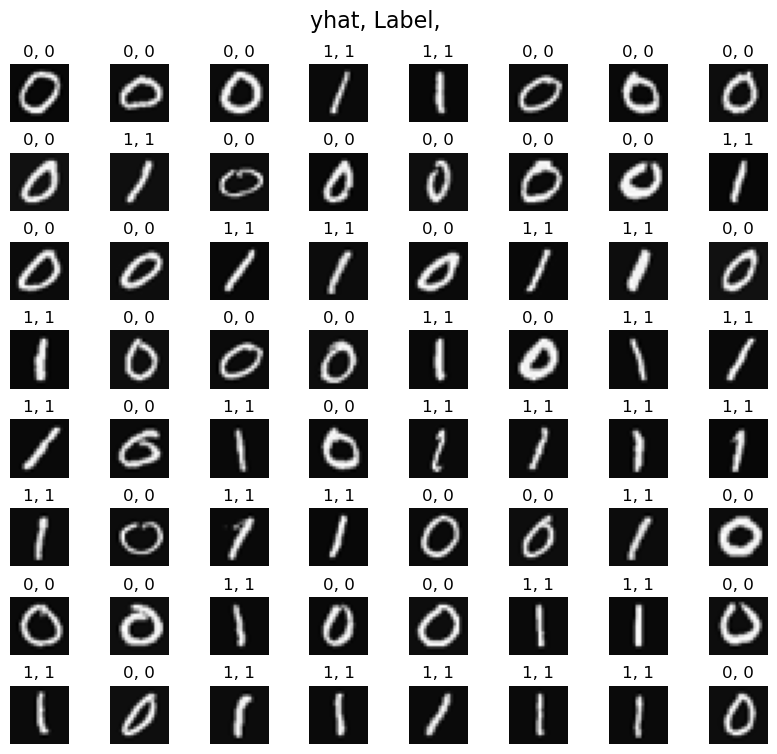

In [116]:
#plotting the images with the tensorflow model predictions
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#plotting the predictions of random 64 images using the trained model
def plot_images(X, y):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]
    # if rect is given, the whole subplots area (including labels) will fit into the rect 
    
    m, n = X.shape
    for idx, ax in enumerate(axes.flat):
        random_idx = np.random.randint(m)
        
        y_hat = model.predict(X[random_idx].reshape(1, 400), verbose=0)
        y_hat_t = (y_hat >= 0.5).astype(int) #[[pred]]
        y_hat_t = y_hat_t.reshape(-1)
        
        X_reshaped = X[random_idx].reshape((20, 20)).T
        ax.imshow(X_reshaped, cmap="gray")
        ax.set_title(f"{y_hat_t[0]}, {y[random_idx, 0]}")
        ax.set_axis_off()
    fig.suptitle("yhat, True Label,", fontsize=16)
    plt.show()
        
plot_images(X, y)

In [119]:
#implementation of the above model in numpy

def dense_layer(act_in, W, b):
    units = W.shape[1]
    act_out = np.zeros(units)
    for i in range(units):
        act_out[i] = sigmoid(np.dot(act_in, W[:, i]) + b[i]) 
    return act_out
        
def sequential_model(X, W1, b1, W2, b2, W3, b3):
    act_1 = dense_layer(X, W1, b1)
    act_2 = dense_layer(act_1, W2, b2)
    act_3 = dense_layer(act_2, W3, b3)
    return act_3

def predict(X, y, W1, b1, W2, b2, W3, b):
    output_preds = np.zeros(len(y),) #(1000,)
    for i in range(len(X)): #1000
#         print(X[i].shape) #(400,)
#         print(W1.shape) #(400, 25)
#         print(b1.shape) #(25,)
        output_preds[i] = sequential_model(X[i], W1, b1, W2, b2, W3, b3)
    y_pred = (output_preds >= 0.5).astype(int)
    return y_pred

X, y = load_data()
#loading params from previously learned tensorflow model
layer1, layer2, layer3 = model.layers
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()
y_pred = predict(X, y, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
print(y_pred.shape)
print(np.unique(y_pred))

(1000,)
(1000,)
[0 1]


In [120]:
# Quick Check
x_tst = 0.1*np.arange(1, 3, 1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1, 7, 1).reshape(2, 3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1, 4, 1).reshape(3,)  # (3 features)
A_tst = dense_layer(x_tst, W_tst, b_tst)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [125]:
# make predictions
prediction = sequential_model(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])

prediction = sequential_model(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


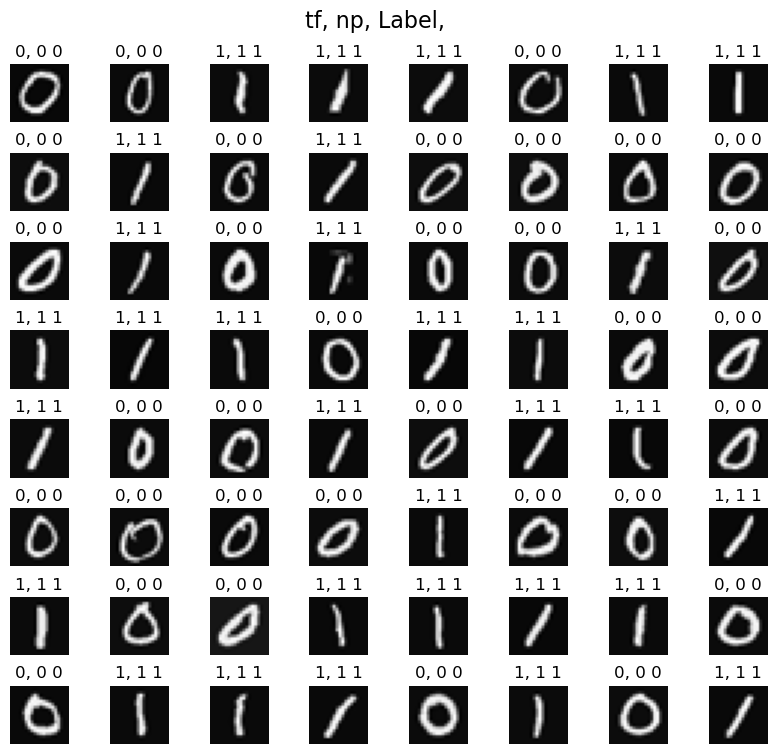

In [145]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#plotting the predictions of random 64 images using the trained model
def plot_images(X, y):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]
    # if rect is given, the whole subplots area (including labels) will fit into the rect 
    
    m, n = X.shape

    for idx, ax in enumerate(axes.flat):
        #generating random index
        random_idx = np.random.randint(m)
        
        # Predict using the Neural Network implemented in tensorflow
        y_hat = model.predict(X[random_idx].reshape(1, 400), verbose=0) #[[pred]] - (1, 1)
        y_hat_tf = int(y_hat.reshape(-1) >= 0.5) #int
#       (y_hat >= 0.5).astype(int)
        
        # Predict using the Neural Network implemented in Numpy
        y_hat = sequential_model(X[random_idx], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp) #(1,)
        y_hat_np = int(y_hat >= 0.5) #int
        
        X_reshaped = X[random_idx].reshape((20, 20)).T
        ax.imshow(X_reshaped, cmap="gray")
        
        
        ax.set_title(f"{y_hat_tf}, {y_hat_np} {y[random_idx, 0]}")
        ax.set_axis_off()
        
    fig.suptitle("tf, np, Label,", fontsize=16)
    plt.show()

layer1, layer2, layer3 = model.layers
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()
plot_images(X, y)

In [147]:
#Vectorized NumPy Model Implementation
layer1, layer2, layer3 = model.layers
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

X_vec = X[0].reshape(-1, 1) #reshaping the first example from row vector (1, 400) to a column vector (400, 1)
z = np.matmul(X_vec.T, W1_tmp) + b1_tmp  #(1, 400) (400, 25)
#note that the data we usually use for models was a row vector i.e already a transpose of column vector
act_1 = sigmoid(z)
print(act_1.shape)

(1, 25)


In [179]:
#Vectorized NumPy Model Implementation
def dense_layer_vec(a_in, w, b):
    z = np.matmul(a_in, w) + b
    a_out = sigmoid(z) # a_in . w + n = (1, 400) (400, 25) + (1, 25) #b will be broadcasted here
    return a_out

def sequential_model(x, W1, b1, W2, b2, W3, b3):
    a_1 = dense_layer_vec(X, W1, b1)
    a_2 = dense_layer_vec(a_1, W2, b2)
    a_3 = dense_layer_vec(a_2, W3, b3)
    return a_3

layer1, layer2, layer3 = model.layers
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

X, y = load_data()
y_probs = sequential_model(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
print(y_probs.shape)
y_pred = (y_probs >= 0.5).numpy().astype(int)
print("predict a zero: ",y_pred[0], "predict a one: ", y_pred[500])

(1000, 1)
predict a zero:  [0] predict a one:  [1]


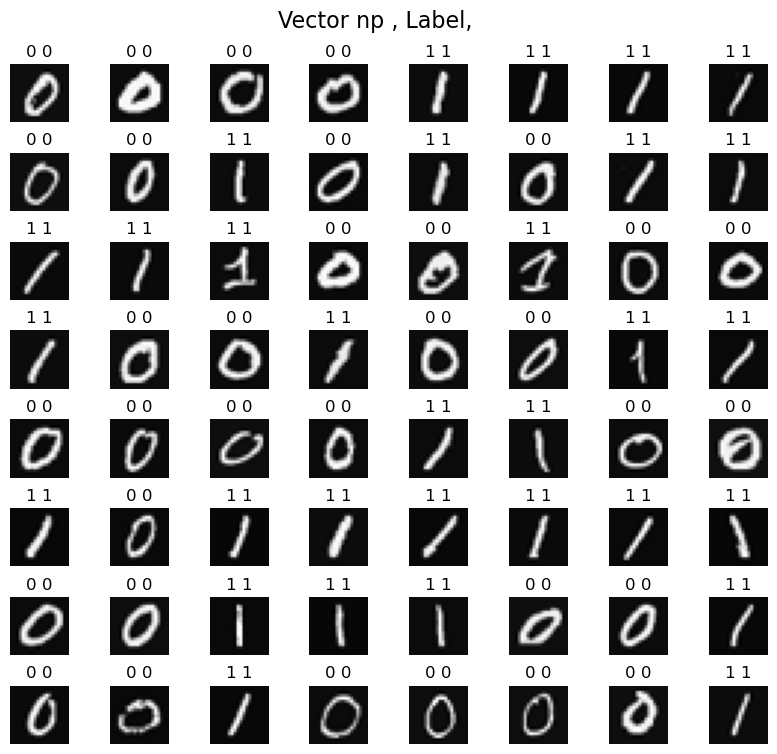

In [180]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#plotting the predictions of random 64 images using the trained model
def plot_images(X, y):
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]
    
    m, n = X.shape

    for idx, ax in enumerate(axes.flat):
        #generating random index
        random_idx = np.random.randint(m)
        
        
        X_reshaped = X[random_idx].reshape((20, 20)).T
        ax.imshow(X_reshaped, cmap="gray")
        
        pred_probs = sequential_model(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
        y_hat = (pred_probs >= 0.5).numpy().astype(int)
        ax.set_title(f"{y_hat[random_idx, 0]} {y[random_idx, 0]}")
        ax.set_axis_off()
        
    fig.suptitle("Vector np , Label,", fontsize=16)
    plt.show()

layer1, layer2, layer3 = model.layers
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()
plot_images(X, y)

(array([142], dtype=int64), array([0], dtype=int64))
2
[142]
[0]


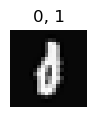

In [191]:
#plot the misclassified images
y_probs = sequential_model(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
y_pred = (y_probs >= 0.5).numpy().astype(int)
errors = np.where(y_pred != y) #gives the boolean values of all the idx
print(errors) 
print(len(errors))
print(errors[0])
print(errors[1])
fig = plt.figure(figsize=(1, 1))
fig.tight_layout(pad=0.1)
ax = fig.add_subplot()
random_index = errors[0][0]
ax.imshow(X[random_index].reshape(20, 20).T, cmap="gray")
plt.title(f"{y[random_index, 0]}, {y_pred[random_index, 0]}")
plt.axis('off')
plt.show()

#### Numpy Broadcasting
    In the last example, Z = XW + b => np.matmul(X,  W) + b utilized NumPy broadcasting to expand the vector 

    XW is a matrix-matrix operation with dimensions (m, j1) (j1, j2) which results in a matrix with dimension (m, j2). To that, we add a vector b with dimension (1, j2). b must be expanded to be a (m, j2) matrix for this element-wise operation to make sense. This expansion is accomplished for you by NumPy broadcasting.

                    Broadcasting applies to "element-wise operations".
    
    Its basic operation is to 'stretch' a smaller dimension by replicating elements to match a larger dimension.

    More specifically: When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

                                   -  they are equal, or
                                   -  one of them is 1

    If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. 
    
    The size of the resulting array is the size that is not 1 along each axis of the inputs.

    Here are some examples:
            a = m x 1         a = 1 x n           a = 4 x 1
            b =     1         b =     1           b = 1 x 3
            _________         _________          __________
            r = m x 1         r = 1 x n          r = 4 x 3
            
            
    In the first eg, Here right most dimension of a and b is 1 which is a match, left dimension for a is m but doesnt have any, hence we expand this lower dimension of b to be the same dimension as a
    
    In the second eg, Here right most dimension of a is n and b is 1 which is a lower dimension compared to a. Hence the broadcast will expand this lower dimension of b to higher dimension of a i.e to n. For Left dimension, we expand the b to the higher dimension of a which is 1. Hence the result will be 1xn
    
     In the third eg, Here right most dimension of a is 1 which is a lower dimension compared to b which is 3 . Hence the broadcast will expand this lower dimension of a to higher dimension of b i.e to 3. For Left dimension, it expands the b to the higher dimension of a which is 4. Hence the result will be 4x3
     
     Broadcast notionally expands arguments to match for element wise operations
    

In [171]:
#element wise addition
a = np.array([1,2,3]).reshape(-1,1)  #(3, 1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


In [172]:
#element wise multiplication
a = np.array([1,2,3]).reshape(-1,1)  #(3, 1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na + b = \n{a * b}")

(a * b).shape: (3, 1), 
a + b = 
[[ 5]
 [10]
 [15]]


In [173]:
#Row-Column Element-Wise Operations
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


In [178]:
#matrix + 1d vector
a = np.array([[1, 2, 3]]) #(1, 3)
b = np.array([1, 2, 3]) #(3,)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1 2 3]]
[1 2 3]
(a + b).shape: (1, 3), 
a + b = 
[[2 4 6]]


In [177]:
#broadcasting in neural network which we have seen above
#imagine we have 4 training examples
#and we have 3 units/neurons in the first layer => 3 activations for all 4 examples at a time + b of size units i.e 3 when using matmul 
#broadcasting will perform element wise operation i.e activation of each example + b
# XW =[[a10 a11 a12    #XW activations of 3 neurons for 1st example
#     a20 a21 a22     #XW activations of 3 neurons for 2nd example
#     a30 a31 a32     #XW activations of 3 neurons for 3rd example
#     a40 a41 a42]]   #XW activations of 3 neurons for 4th example

#note that XW + b is what we call an actual activation. For simplicity we are calling results of XW as activations here.thats it

# activations shape = (4, 3) #matrix
# b shape = 1d vector of size neurons - (3,)  b = [b1 b2 b3] #bias for each neuron
#when we do the + for XW and b => XW + b
#XW =  4 x 3
#b =       3
#___________
#r = 4 * 3 => final activations for all examples of all neurons

In [182]:
# # UNIT TESTS
# from tensorflow.keras.activations import sigmoid
# from tensorflow.keras.layers import Dense

# import numpy as np

# def test_c1(target):
#     assert len(target.layers) == 3, \
#         f"Wrong number of layers. Expected 3 but got {len(target.layers)}"
#     assert target.input.shape.as_list() == [None, 400], \
#         f"Wrong input shape. Expected [None,  400] but got {target.input.shape.as_list()}"
#     i = 0
#     expected = [[Dense, [None, 25], sigmoid],
#                 [Dense, [None, 15], sigmoid],
#                 [Dense, [None, 1], sigmoid]]

#     for layer in target.layers:
#         assert type(layer) == expected[i][0], \
#             f"Wrong type in layer {i}. Expected {expected[i][0]} but got {type(layer)}"
#         assert layer.output.shape.as_list() == expected[i][1], \
#             f"Wrong number of units in layer {i}. Expected {expected[i][1]} but got {layer.output.shape.as_list()}"
#         assert layer.activation == expected[i][2], \
#             f"Wrong activation in layer {i}. Expected {expected[i][2]} but got {layer.activation}"
#         i = i + 1

#     print("\033[92mAll tests passed!")
    
# def test_c2(target):
    
#     def linear(a):
#         return a
    
#     def linear_times3(a):
#         return a * 3
    
#     x_tst = np.array([1., 2., 3., 4.])  # (1 examples, 4 features)
#     W_tst = np.array([[1., 2.], [1., 2.], [1., 2.], [1., 2.]]) # (4 input features, 2 output features)
#     b_tst = np.array([0., 0.])  # (2 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert A_tst.shape[0] == len(b_tst)
#     assert np.allclose(A_tst, [10., 20.]), \
#         "Wrong output. Check the dot product"
    
#     b_tst = np.array([3., 5.])  # (2 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert np.allclose(A_tst, [13., 25.]), \
#         "Wrong output. Check the bias term in the formula"
    
#     A_tst = target(x_tst, W_tst, b_tst, linear_times3)
#     assert np.allclose(A_tst, [39., 75.]), \
#         "Wrong output. Did you apply the activation function at the end?"
    
#     print("\033[92mAll tests passed!")  
    
# def test_c3(target):
    
#     def linear(a):
#         return a
    
#     def linear_times3(a):
#         return a * 3
    
#     x_tst = np.array([1., 2., 3., 4.])  # (1 examples, 3 features)
#     W_tst = np.array([[1., 2.], [1., 2.], [1., 2.], [1., 2.]]) # (3 input features, 2 output features)
#     b_tst = np.array([0., 0.])  # (2 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert A_tst.shape[0] == len(b_tst)
#     assert np.allclose(A_tst, [10., 20.]), \
#         "Wrong output. Check the dot product"
    
#     b_tst = np.array([3., 5.])  # (2 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert np.allclose(A_tst, [13., 25.]), \
#         "Wrong output. Check the bias term in the formula"
    
#     A_tst = target(x_tst, W_tst, b_tst, linear_times3)
#     assert np.allclose(A_tst, [39., 75.]), \
#         "Wrong output. Did you apply the activation function at the end?"
    
#     x_tst = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])  # (2 examples, 4 features)
#     W_tst = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12]]) # (3 input features, 2 output features)
#     b_tst = np.array([0., 0., 0.])  # (2 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert A_tst.shape == (2, 3)
#     assert np.allclose(A_tst, [[ 70.,  80.,  90.], [158., 184., 210.]]), \
#         "Wrong output. Check the dot product"
    
#     b_tst = np.array([3., 5., 6])  # (3 features)
    
#     A_tst = target(x_tst, W_tst, b_tst, linear)
#     assert np.allclose(A_tst, [[ 73.,  85.,  96.], [161., 189., 216.]]), \
#         "Wrong output. Check the bias term in the formula"
    
#     A_tst = target(x_tst, W_tst, b_tst, linear_times3)
#     assert np.allclose(A_tst, [[ 219.,  255.,  288.], [483., 567., 648.]]), \
#         "Wrong output. Did you apply the activation function at the end?"
    
#     print("\033[92mAll tests passed!")  
    
# test_c1(model)
# test_c2(dense_layer)
# test_c3(dense_layer_vec)